In [555]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
#import plotly.express as px

from pandas_profiling import ProfileReport
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error


In [556]:
KAGGLE_EVAL_METRIC = 'logloss' # string name for loss function in xgboost

In [557]:
TRAIN_PATH = "data/train.csv"
TEST_PATH = "data/test.csv"

# Load Data

In [558]:
temp = pd.read_csv(TRAIN_PATH)
temp2 = pd.read_csv(TEST_PATH)

In [559]:
temp['label'] = 'train'
temp2['label'] = 'test'#X_test = test.drop(to_drop, axis=1)
#y_test = test['Age']

In [560]:
temp = temp.append(temp2)

In [561]:
train = temp[temp['Age'].isnull() == False]
test = temp[temp['Age'].isnull() == True]

In [562]:
ageplot = sns.FacetGrid(train, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

/home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


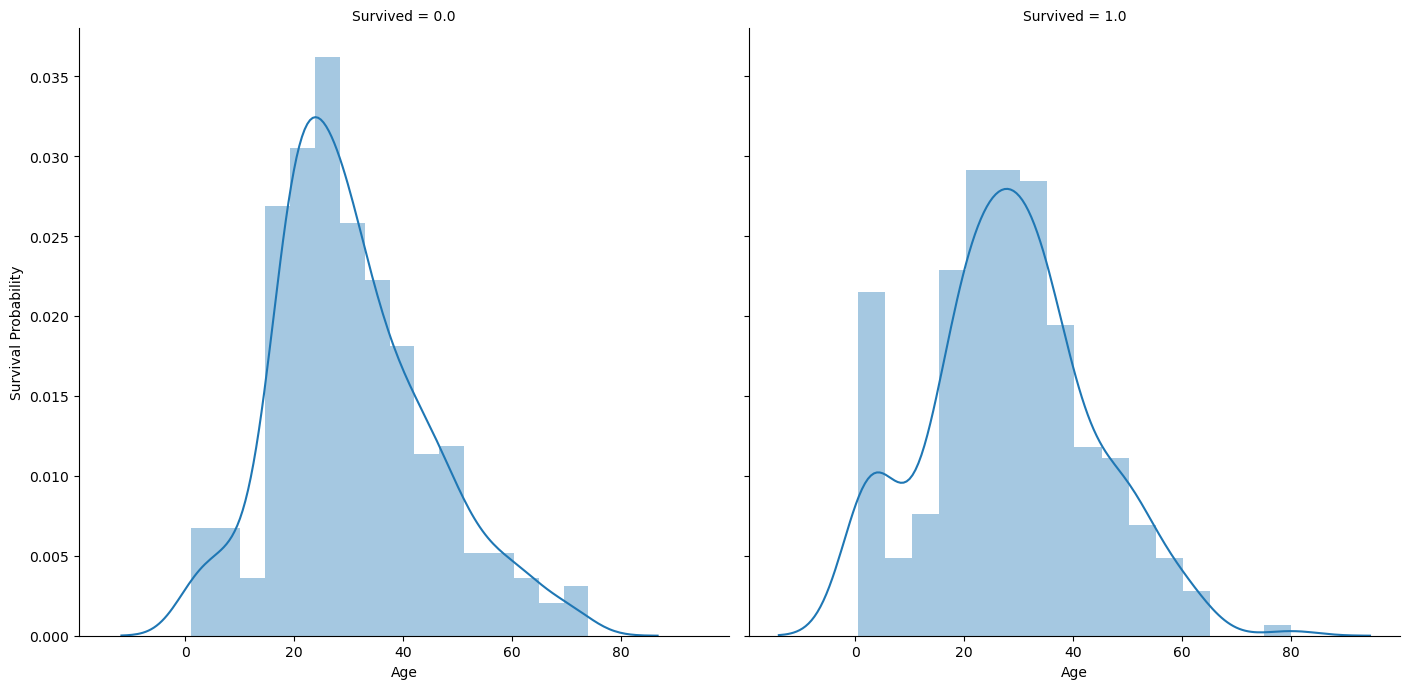

In [563]:
plt.show()

In [564]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,test
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,test
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test


In [565]:
train['Age'] = np.where(train['Age'] < 10, 1, 0)

<ipython-input-565-7721a5846821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = np.where(train['Age'] < 10, 1, 0)


In [566]:
test['Age'] = np.where(test['Age'] < 10, 1, 0)

<ipython-input-566-e10aa3a468f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'] = np.where(test['Age'] < 10, 1, 0)


In [567]:
target = ["Age"]

In [568]:
#X = train.drop(target, axis=1)
#y = train[target]

In [569]:
train['Survived'] = train['Survived'].fillna(2)
test['Survived'] = test['Survived'].fillna(2)

<ipython-input-569-4a1d861087c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = train['Survived'].fillna(2)
<ipython-input-569-4a1d861087c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Survived'] = test['Survived'].fillna(2)


# Pre-Processing

# NLP STUFF

### Names

In [570]:
## Helper functions
def get_nickanme(x):
    if "(" in x:
        nickname = re.findall('\(.*?\)',x)[0]
    elif '"' in x:
        nickname = re.findall('\".*?\"',x)[0]
    else:
        nickname = "none"
    return nickname

def get_lastname(name, first_name, title, nickname):
    last_name = name.replace(first_name,'')
    last_name = last_name.replace(title,'')
    last_name = last_name.replace(nickname,'')
    last_name = last_name.replace(',','')
    return last_name

def replace_last(source_string, replace_what):
    head, _sep, tail = source_string.rpartition(replace_what)
    return head + "" + tail


In [571]:
def nlp_transforms(df):
    df.Name = df.Name.str.lower()

    ## first name, title, nickname
    df['First Name'] = df['Name'].apply(lambda x: x.split(",")[0])
    df['Title'] = df['Name'].apply(lambda x: x.split(",")[1].split()[0])
    df['Nickname'] = df['Name'].apply(lambda x: get_nickanme(x))
    df['Last Name'] = df.apply(lambda x: get_lastname(x['Name'], x['First Name'],x['Title'],x['Nickname']), axis=1)
    df['Junior'] = df['Last Name'].apply(lambda x: x.endswith(("jr","ii")))
    df['Last Name'] = df['Last Name'].apply(lambda x: replace_last(x, "jr"))
    df['Last Name'] = df['Last Name'].apply(lambda x: replace_last(x, "ii"))
    return df

In [572]:
train = nlp_transforms(train)
test = nlp_transforms(test)

/home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-571-f9a0e0cb6871>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['First Name'] = df['Name'].apply(lambda x: x.split(",")[0])
<ipython-input-571-f9a0e0cb6871>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Tickets

In [573]:
def replace_number(ticket, number):
    x = ticket.replace(str(number), '')
    return x

def ticket_transforms(df):
    df.Ticket = df.Ticket.str.lower()

    df['temp'] = df.Ticket.str.split()
    df['Ticket Number'] = df.temp.apply(lambda x: x[-1])
    df["Ticket Number"] = df["Ticket Number"].str.replace('line','0')
    df["Ticket Number"] = df["Ticket Number"].astype(int)
    df['Ticket Type'] = df.apply(lambda x: replace_number(x['Ticket'], x['Ticket Number']), axis=1)
    df = df.drop(['temp'],axis=1)
    return df

In [574]:
train = ticket_transforms(train)
test = ticket_transforms(test)

<ipython-input-573-972e9563a9c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df.Ticket.str.split()
<ipython-input-573-972e9563a9c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticket Number'] = df.temp.apply(lambda x: x[-1])
<ipython-input-573-972e9563a9c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [575]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1046 non-null   int64  
 1   Survived       1046 non-null   float64
 2   Pclass         1046 non-null   int64  
 3   Name           1046 non-null   object 
 4   Sex            1046 non-null   object 
 5   Age            1046 non-null   int64  
 6   SibSp          1046 non-null   int64  
 7   Parch          1046 non-null   int64  
 8   Ticket         1046 non-null   object 
 9   Fare           1045 non-null   float64
 10  Cabin          272 non-null    object 
 11  Embarked       1044 non-null   object 
 12  label          1046 non-null   object 
 13  First Name     1046 non-null   object 
 14  Title          1046 non-null   object 
 15  Nickname       1046 non-null   object 
 16  Last Name      1046 non-null   object 
 17  Junior         1046 non-null   bool   
 18  Ticket Nu

In [576]:
# predict age

## Define Features and Target

In [577]:
## helper to build feature list
categorical_features = ['Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked','Title','Junior','Nickname','Last Name','Ticket Type']
numeric_features = ['SibSp','Parch','Fare','Ticket Number']

def feature_selection(drop_cols, categorical_cols, ordinal_cols):
    for column in drop_cols:
        if column in categorical_cols: categorical_cols.remove(column)
        if column in ordinal_cols: ordinal_cols.remove(column)
    features = categorical_features + numeric_features
    return features,categorical_features,numeric_features

In [578]:
to_drop = ["Age","PassengerId","Name","Last Name","Ticket","Ticket Number",'label']

In [579]:
features,categorical_features,numeric_features = feature_selection(to_drop,categorical_features,numeric_features)

In [580]:
X = train.drop(to_drop, axis=1)
y = train['Age']

In [581]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Pipeline

In [582]:
X_train = train.drop(to_drop, axis=1)
y_train = train['Age']

X_test = test.drop(to_drop, axis=1)
y_test = test['Age']

In [583]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [584]:
categorical_features

['Survived',
 'Pclass',
 'Sex',
 'Cabin',
 'Embarked',
 'Title',
 'Junior',
 'Nickname',
 'Ticket Type']

In [585]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [586]:
xgb = XGBRegressor(max_depth=6,
                    min_child_weight=1,
                    learning_rate=0.05,
                    n_estimators=100,
                    silent=True,
                    )


In [587]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb)])

In [588]:
model.fit(X_train, y_train)

[20:17:13] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   

In [589]:
y_pred = model.predict(X_test)

In [590]:
y_pred

array([ 3.59627022e-03,  2.64646905e-03,  3.59627022e-03,  3.59627022e-03,
        1.62958018e-02,  3.59627022e-03,  3.27777746e-03,  1.62958018e-02,
        3.59627022e-03,  3.59627022e-03,  3.59627022e-03,  4.94566327e-03,
        1.62958018e-02,  4.94566327e-03,  2.64646905e-03,  2.64646905e-03,
        9.94131744e-01,  3.59627022e-03,  3.59627022e-03,  1.62958018e-02,
        3.59627022e-03,  3.59627022e-03,  3.59627022e-03,  3.59627022e-03,
        4.80061956e-02,  3.59627022e-03,  3.59627022e-03,  9.34746623e-01,
        7.71718659e-03,  3.59627022e-03,  3.59627022e-03,  6.64841235e-01,
        4.86222375e-03,  2.64646905e-03,  9.00922894e-01,  1.24893956e-01,
        2.64646905e-03,  2.61291629e-03,  4.94566327e-03,  3.59627022e-03,
        1.62958018e-02,  1.70414941e-03,  4.26113140e-03,  3.59627022e-03,
        8.63747418e-01,  2.17890204e-03,  2.50846688e-02,  4.80061956e-02,
        3.59627022e-03,  2.61291629e-03,  3.59627022e-03,  2.17890204e-03,
        2.64646905e-03,  

In [592]:
upload['is_child'] = y_pred

In [593]:
upload['is_child'] = upload['is_child'].round(0)

In [596]:
upload.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,label,First Name,Title,Nickname,Last Name,Junior,Ticket Number,Ticket Type,age_pediction,is_child
408,1300,2.0,3,"riordan, miss. johanna hannah""""",female,2.0,0,0,334915,7.7208,...,test,riordan,miss.,"""""",johanna hannah,False,334915,,2.0,0.0
410,1302,2.0,3,"naughton, miss. hannah",female,2.0,0,0,365237,7.7500,...,test,naughton,miss.,none,hannah,False,365237,,2.0,0.0
413,1305,2.0,3,"spector, mr. woolf",male,2.0,0,0,a.5. 3236,8.0500,...,test,spector,mr.,none,woolf,False,3236,a.5.,2.0,0.0
416,1308,2.0,3,"ware, mr. frederick",male,2.0,0,0,359309,8.0500,...,test,ware,mr.,none,frederick,False,359309,,2.0,0.0
417,1309,2.0,3,"peter, master. michael j",male,2.0,1,1,2668,22.3583,...,test,peter,master.,none,michael j,False,2668,,1.0,1.0


In [597]:
upload.to_csv('data/age_predictions.csv')

In [544]:
y_pred[12]

1.9751403

In [545]:
y_test.values[12]

2.0

In [493]:
mean_squared_error(y_test, y_pred, squared=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
### print(metrics.accuracy_score(y_test, y_pred))

In [1079]:
def feature_selection(drop_cols, categorical_cols, ordinal_cols):
    for column in drop_cols:
        if column in categorical_cols: categorical_cols.remove(column)
        if column in ordinal_cols: ordinal_cols.remove(column)
    features = categorical_cols + ordinal_cols
    return features

In [490]:
features = feature_selection(drop_columns,categorical,ordinal)

In [491]:
train = train[features] 
test = test[features]

---

Combine train + test to ensure they receive the same preproccessing (category indexs)

In [492]:
train['label'] = 'train'
test['label'] = 'test'

to_clean = train.append(test)

---

## NULLS
To start we'll use XGBOOST and let the algo deal with nulll.
- Age: 
- SibSpa
- Parch
- Fare:
- Embark: 

Future iterations, we can improve score by doing a better job with our NULL values.

In [493]:
#train = train.fillna(-1)
#test = test.fillna(-1)

--- 

## Categorical Data
Transform categorical features to integer representatins

In [494]:
# categorical encoding
def objects_to_category(df):
    '''
    function that converts objects to categorical features.
    '''
    object_cols = df.columns.tolist()
    object_features = df[object_cols].astype("category")
    for field in object_cols:
        df[field] = object_features[field].cat.codes
    return df

to_clean[categorical] = objects_to_category(to_clean[categorical])
to_clean[categorical] = objects_to_category(to_clean[categorical])

<ipython-input-494-e4c6efef39e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field] = object_features[field].cat.codes


In [495]:
to_clean.head()

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Title,Junior,Nickname,Age,SibSp,Parch,Fare,label
0,2,155,1,720,0,3,12,0,251,22.0,1,0,7.2500,train
1,0,286,0,816,107,1,13,0,139,38.0,1,0,71.2833,train
2,2,530,0,914,0,3,9,0,251,26.0,0,0,7.9250,train
3,0,429,0,65,71,3,13,0,178,35.0,1,0,53.1000,train
4,2,22,1,649,0,3,12,0,251,35.0,0,0,8.0500,train


---

## Done

In [496]:
train = to_clean[to_clean['label'] == 'train'].drop('label',axis=1)
test = to_clean[to_clean['label'] == 'test'].drop('label',axis=1)

Drop features that we don't want to use

In [497]:
print(features)

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Junior', 'Nickname', 'Age', 'SibSp', 'Parch', 'Fare']


# Modeling

In [498]:
X = train[features]
y = target

In [499]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [857]:
#View notbook for details on  Parameter Tuning
clf = XGBClassifier(max_depth=4,
                    min_child_weight=1,
                    learning_rate=0.05,
                    n_estimators=100,
                    silent=True,
                    objective='binary:logistic',
                    #gamma=4,
                    #max_delta_step=0,
                    #subsample=0.88,
                    #colsample_bytree=1,
                    #colsample_bylevel=1,
                    #reg_alpha=0,
                    #reg_lambda=0,
                    #scale_pos_weight=1,
                    #seed=1,
                    #missing=None,
                    #enable_categorical=True
                    )

clf.fit(
    X_train,
    y_train,
    eval_metric=KAGGLE_EVAL_METRIC,
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=False,
    early_stopping_rounds = 10
)

/home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Sex, Ticket, Cabin, Embarked, First Name, Title, Nickname

In [772]:
# riding style null fixed
## Create Report
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

results = pd.DataFrame(y_test)
#temp = pd.DataFrame(probs)
results['actual_classification'] = y_test
results['predicted_classification'] = y_pred
results['baseline_classification'] = 1
results['buy_prob_28'] = probs[:,1]

# baseline
print("Guess Everyone Survived")
print(metrics.accuracy_score(results['actual_classification'], results['baseline_classification']))
print("---")
print("Model Predicitons")

plt.rcParams["figure.figsize"] = (8, 6)
matrix = metrics.confusion_matrix(results['actual_classification'], results['predicted_classification'])
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.show()

#classification summary stats
print(metrics.log_loss(results['actual_classification'],results['buy_prob_28']))
print(metrics.accuracy_score(results['actual_classification'], results['predicted_classification']))
#print(metrics.roc_auc_score(results['actual_classification'],results['buy_prob_28']))
#print(metrics.brier_score_loss(results['actual_classification'],results['buy_prob_28']))
#print(metrics.f1_score(results['actual_classification'], results['predicted_classification']))
#print(metrics.recall_score(results['actual_classification'], results['predicted_classification']))
#print(metrics.precision_score(results['actual_classification'], results['predicted_classification']))
#print(metrics.average_precision_score(results['actual_classification'], results['predicted_classification']))

/home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBoostError: [16:46:51] ../src/c_api/../data/array_interface.h:139: Check failed: typestr.size() == 3 (2 vs. 3) : `typestr' should be of format <endian><type><size of type in bytes>.
Stack trace:
  [bt] (0) /home/neil/anaconda3/envs/ds_py_3.8/lib/libxgboost.so(+0xa14eb) [0x7f2b92a234eb]
  [bt] (1) /home/neil/anaconda3/envs/ds_py_3.8/lib/libxgboost.so(+0xaafdd) [0x7f2b92a2cfdd]
  [bt] (2) /home/neil/anaconda3/envs/ds_py_3.8/lib/libxgboost.so(+0xaf0d2) [0x7f2b92a310d2]
  [bt] (3) /home/neil/anaconda3/envs/ds_py_3.8/lib/libxgboost.so(XGBoosterPredictFromDense+0x105) [0x7f2b92a34c45]
  [bt] (4) /home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x7f2bd730c9dd]
  [bt] (5) /home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x7f2bd730c067]
  [bt] (6) /home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0xa56) [0x7f2bd7326f96]
  [bt] (7) /home/neil/anaconda3/envs/ds_py_3.8/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1590c) [0x7f2bd732790c]
  [bt] (8) /home/neil/anaconda3/envs/ds_py_3.8/bin/python(_PyObject_MakeTpCall+0x158) [0x55f6dae62da8]



In [502]:
## dropping everything made it worst...
## Seems like with xgboost, the best thing to do is to get into feature engineering as fast as possible...

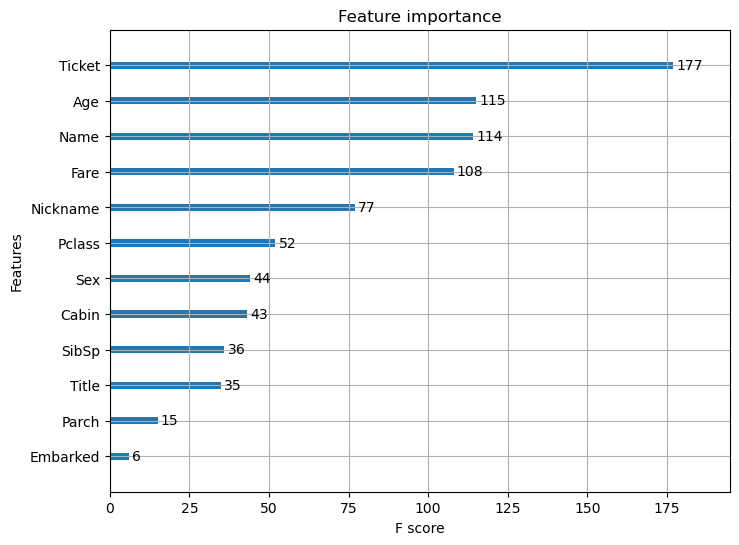

In [503]:
plot_importance(clf)
plt.show()

In [259]:
## I would assume "NAME", "TICK", are over fitting...

## Neil's Custome Pipeline

In [249]:
#load_data()

#target = train["Survived"]
#categorical = ['Pclass','Name','Sex','Ticket','Cabin','Embarked']
#ordinal = ['Age','SibSp','Parch','Fare']
#drop_columns = ["SibSp","Cabin","Ticket","Parch"]

#define features
#features = feature_selection(cols_to_drop, cat_cols, num_cols)
#train = train[features] 
#test = test[features]